In [1]:
library(DBI)
library(ggplot2)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
✔ purrr   1.0.0      
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
mytheme <- function() {
  return(theme_bw() +
           theme(
             # NOTE: UNCOMMENT WHEN RENDING PLOTS FOR THE PAPER
             # (can't get the CM fonts to work in artifact VM...)
             text = element_text(family = "Times", size=10),
              # panel.grid.major = element_blank(),
             # panel.grid.minor = element_blank(),
             # panel.grid.major = element_line(colour="gray", size=0.1),
             # panel.grid.minor =
             #  element_line(colour="gray", size=0.1, linetype='dotted'),
            #  axis.ticks = element_line(size=0.05),
            #  axis.ticks.length=unit("-0.05", "in"),
            #  axis.text.y = element_text(margin = margin(r = 5)),
            #  axis.text.x = element_text(hjust=1),
             legend.key = element_rect(colour=NA),
             legend.spacing = unit(0.001, "in"),
             legend.key.size = unit(0.2, "in"),
             legend.title = element_blank(),
             legend.position = c(0.75, .7),
             legend.background = element_blank()))
}

mysave <- function(filename) {
  ggsave(filename, width=4, height=3, units=c("in"))
}

In [3]:
con <- dbConnect(
    RPostgres::Postgres(),
    dbname = 'npm_data', 
    user = 'data_analyzer',
)

In [4]:
# This takes about 40 seconds to load (when running on the VM!), and takes about 4GB of memory
df_from_sql <- dbGetQuery(con, "
    SELECT 
        d.blob_storage_key as key, d.num_bytes, v.package_id, m.total_downloads
    FROM downloaded_tarballs d
    JOIN versions v ON v.tarball_url = d.tarball_url
    LEFT JOIN metadata_analysis.total_package_downloads m ON m.package_id = v.package_id
    where d.num_bytes is not null
")

In [5]:
df_from_sql2 <- df_from_sql %>% mutate(n_bytes = as.numeric(num_bytes))

In [6]:
df <- df_from_sql2 %>% 
        arrange(n_bytes) %>% 
        mutate(
            csum = cumsum(n_bytes), 
            row_num = row_number(), 
            perc_sum_bytes = csum / sum(n_bytes),
            perc_rows = row_num / nrow(df_from_sql2))

In [7]:
head(df)

,key,num_bytes,package_id,total_downloads,n_bytes,csum,row_num,perc_sum_bytes,perc_rows
,<chr>,<int64>,<int64>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,imb_plugin-1.0.11.tgz,10,2158260,34862,10,10,1,3.832457e-13,2.797771e-08
2,cbk-tools-0.0.1-beta.34.tgz,20,1005998,10083,20,30,2,1.149737e-12,5.595542e-08
3,cbk-tools-0.0.1-beta.35.tgz,20,1005998,10083,20,50,3,1.916229e-12,8.393313e-08
4,@idn-model-test-1.0.0.tgz,29,677615,782,29,79,4,3.027641e-12,1.119108e-07
5,npmal-0.0.0.tgz,56,1463055,2379,56,135,5,5.173817e-12,1.398885e-07
6,gital-0.0.0.tgz,57,1226824,18192,57,192,6,7.358318e-12,1.678663e-07


In [8]:
sum(df$n_bytes) / 1000 / 1000 / 1000 / 1000

[1] 26.09292

In [9]:
mean(df$n_bytes)

[1] 730020.1

In [10]:
median(df$n_bytes)

[1] 18403

In [42]:
ggplot(df, aes(x=n_bytes)) + stat_ecdf()

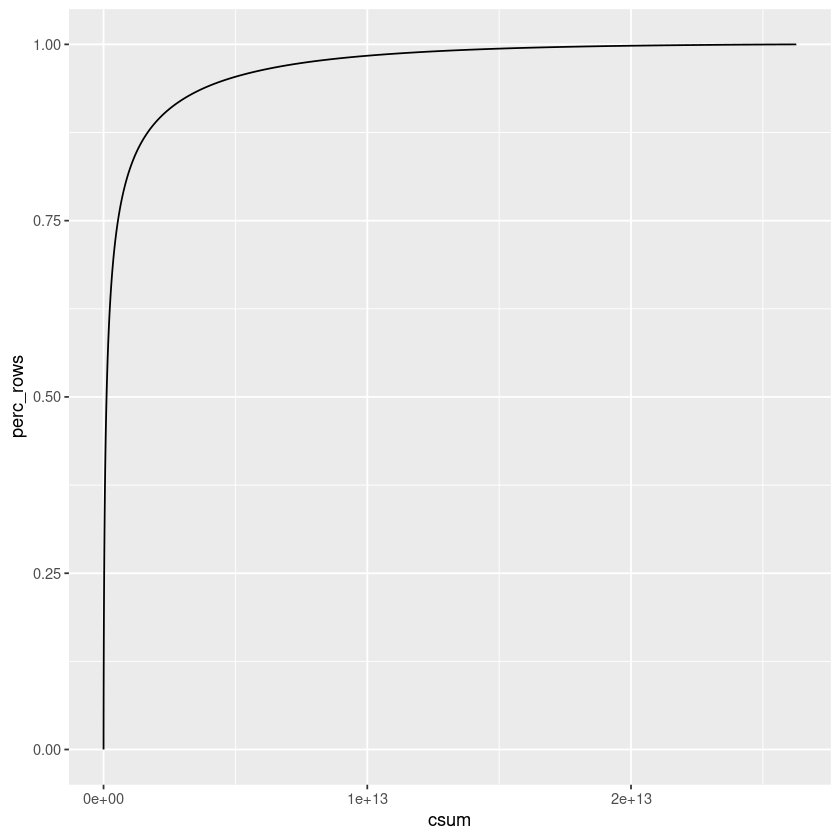

In [ ]:
ggplot(df, aes(x=csum, y=perc_rows)) + geom_line()

In [43]:
df %>% filter(perc_sum_bytes <= 0.5)

key,num_bytes,package_id,total_downloads,n_bytes,csum,row_num,perc_sum_bytes,perc_rows
<chr>,<int64>,<int64>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
imb_plugin-1.0.11.tgz,10,2158260,34862,10,10,1,3.832457e-13,2.797771e-08
cbk-tools-0.0.1-beta.34.tgz,20,1005998,10083,20,30,2,1.149737e-12,5.595542e-08
cbk-tools-0.0.1-beta.35.tgz,20,1005998,10083,20,50,3,1.916229e-12,8.393313e-08
@idn-model-test-1.0.0.tgz,29,677615,782,29,79,4,3.027641e-12,1.119108e-07
npmal-0.0.0.tgz,56,1463055,2379,56,135,5,5.173817e-12,1.398885e-07
gital-0.0.0.tgz,57,1226824,18192,57,192,6,7.358318e-12,1.678663e-07
gitist-0.0.0.tgz,58,1228411,18028,58,250,7,9.581143e-12,1.958440e-07
shlipidib-0.0.0.tgz,61,1754514,18114,61,311,8,1.191894e-11,2.238217e-07
whatchika-0.0.0.tgz,61,1949170,17924,61,372,9,1.425674e-11,2.517994e-07


In [55]:
df %>% filter(n_bytes > 100000000) %>% arrange(desc(n_bytes))

key,num_bytes,package_id,total_downloads,n_bytes,csum,row_num,perc_sum_bytes,perc_rows
<chr>,<int64>,<int64>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
house-0.0.40.tgz,515822154,2147322,511304,515822154,2.609292e+13,35742741,1.0000000,1.0000000
ep_latex-0.0.1.tgz,280949105,2064872,3949,280949105,2.609240e+13,35742740,0.9999802,1.0000000
react-native-stepper-touch-0.0.1.tgz,201313555,1588402,1855,201313555,2.609212e+13,35742739,0.9999695,0.9999999
react-native-stepper-touch-0.0.2.tgz,201313495,1588402,1855,201313495,2.609192e+13,35742738,0.9999617,0.9999999
sale-client-3.3.27.tgz,201278283,2420553,1063385,201278283,2.609172e+13,35742737,0.9999540,0.9999999
sale-client-3.3.29.tgz,201277105,2420553,1063385,201277105,2.609152e+13,35742736,0.9999463,0.9999999
pixiv6-1.0.0.tgz,201179683,1516317,703,201179683,2.609132e+13,35742735,0.9999386,0.9999998
cordova-adcel-plugin-1.0.3.tgz,201106336,2298746,87475,201106336,2.609112e+13,35742734,0.9999309,0.9999998
react-native-rn-bytte-bio-lib-miid-1.0.19.tgz,201060465,2340351,NA,201060465,2.609092e+13,35742733,0.9999232,0.9999998


In [14]:
would_delete <- df %>% filter(n_bytes > 100000000) # 15936476

In [15]:
would_delete %>% arrange(desc(total_downloads))

key,num_bytes,package_id,total_downloads,n_bytes,csum,row_num,perc_sum_bytes,perc_rows
<chr>,<int64>,<int64>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
gherkin-8.0.0.tgz,120742346,2110906,187821367,120742346,2.425282e+13,35730597,0.9294791,0.9996602
web-encoding-1.0.1.tgz,116186556,1938460,70073649,116186556,2.406466e+13,35729010,0.9222677,0.9996158
web-encoding-0.0.0.tgz,116186563,1938460,70073649,116186563,2.406477e+13,35729011,0.9222721,0.9996159
@goodgamestudios-cxf-webshop-6.20.0.tgz,117548053,1191245,45959860,117548053,2.411648e+13,35729453,0.9242538,0.9996282
@goodgamestudios-cxf-webshop-6.20.1-qa.1.tgz,117561881,1191245,45959860,117561881,2.411754e+13,35729462,0.9242944,0.9996285
ember-source-2.11.0-beta.1.tgz,138559478,2416367,37130641,138559478,2.484175e+13,35735164,0.9520494,0.9997880
lottie-ios-3.4.0.tgz,169053411,2208311,34164140,169053411,2.555117e+13,35739807,0.9792375,0.9999179
node-linux-x64-0.10.15.tgz,101531247,2264292,30061303,101531247,2.351551e+13,35723962,0.9012219,0.9994746
node-linux-x64-0.10.14.tgz,106848943,2264292,30061303,106848943,2.371065e+13,35725830,0.9087005,0.9995269


In [48]:
would_delete %>% group_by(package_id) %>% summarise(total_downloads = mean(total_downloads)) %>% arrange(desc(total_downloads))

package_id,total_downloads
<int64>,<dbl>
2070012,2752946537
2234759,1581280025
1941877,1179235006
2334476,890572951
2368199,566896912
2040131,531582332
1191241,408051550
2401222,353454015
2359289,347468684


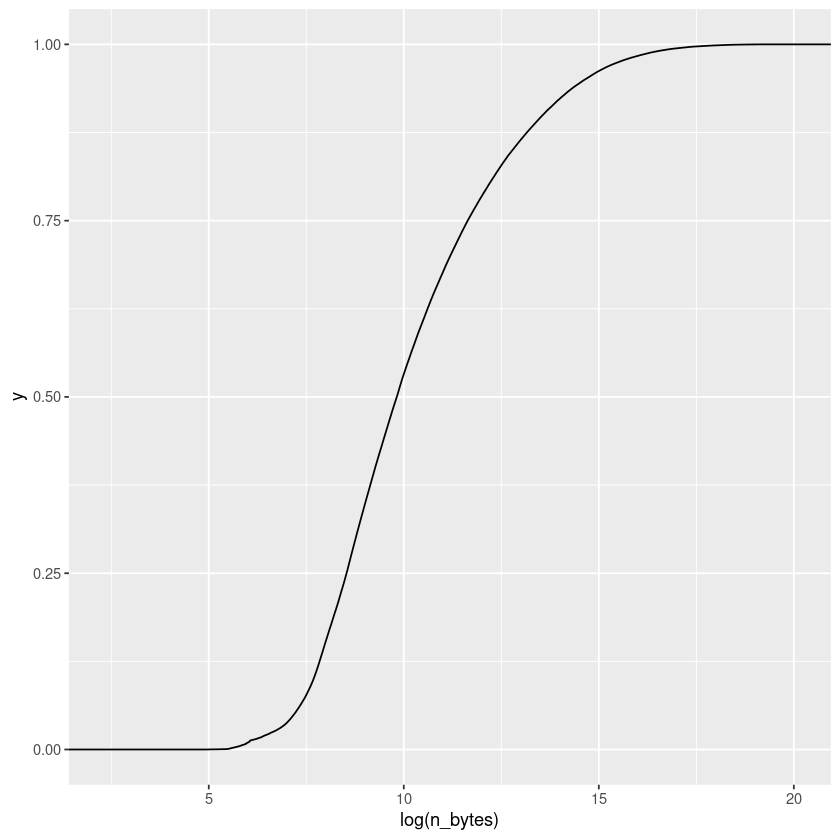

In [62]:
#df #%>% filter(is.na(n_bytes))

ggplot(df, aes(x=log(n_bytes))) + stat_ecdf()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


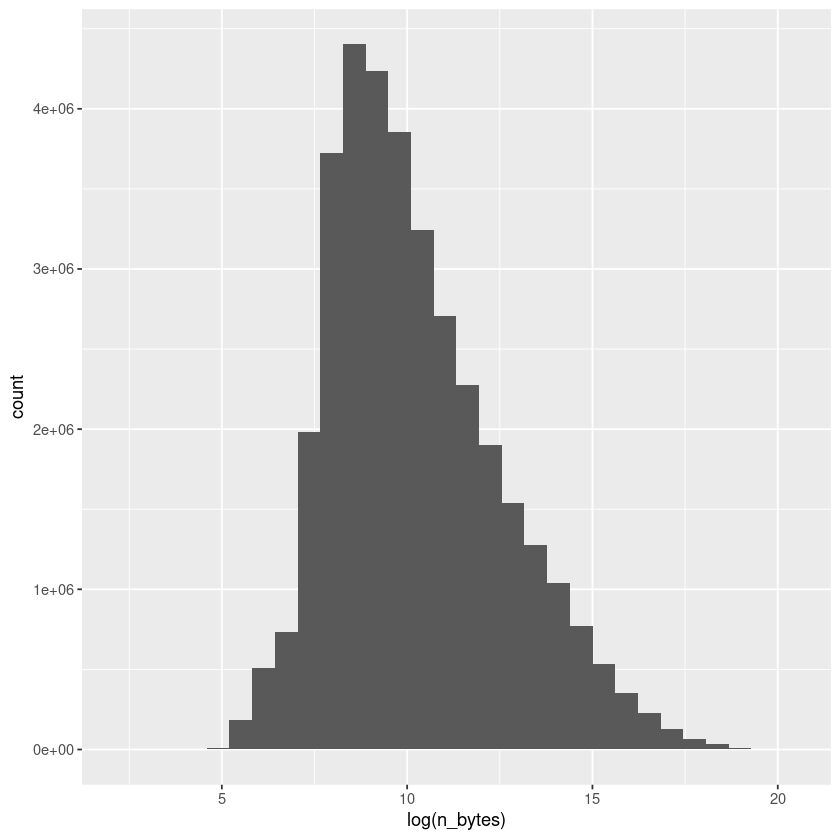

In [63]:
ggplot(df, aes(x=log(n_bytes))) + geom_histogram()

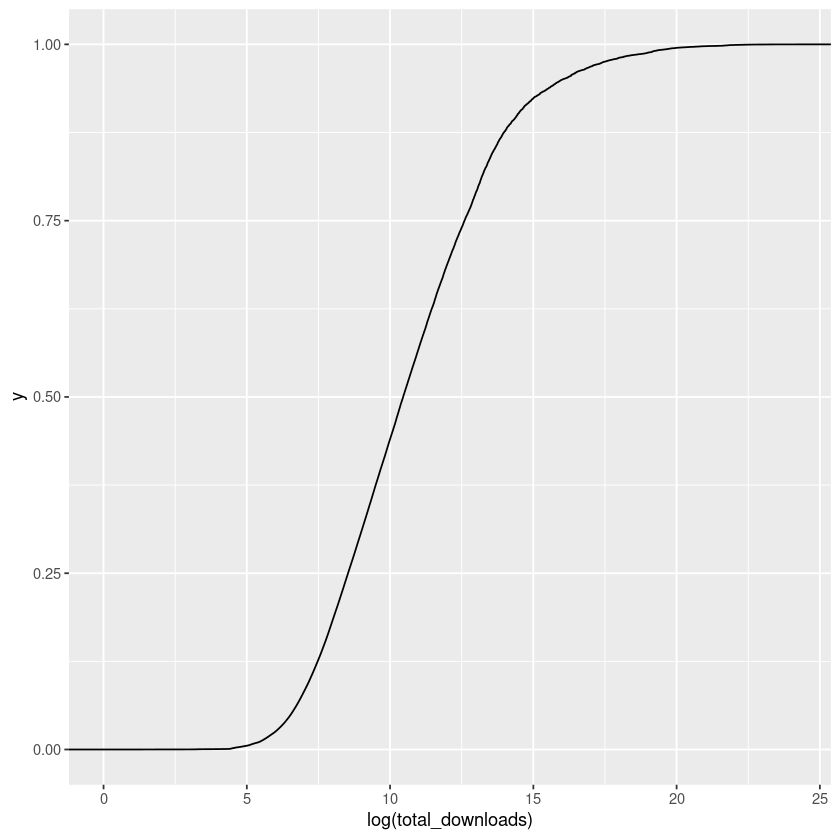

In [66]:
df %>% filter(total_downloads > 0) %>% ggplot(aes(x=log(total_downloads))) + stat_ecdf()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


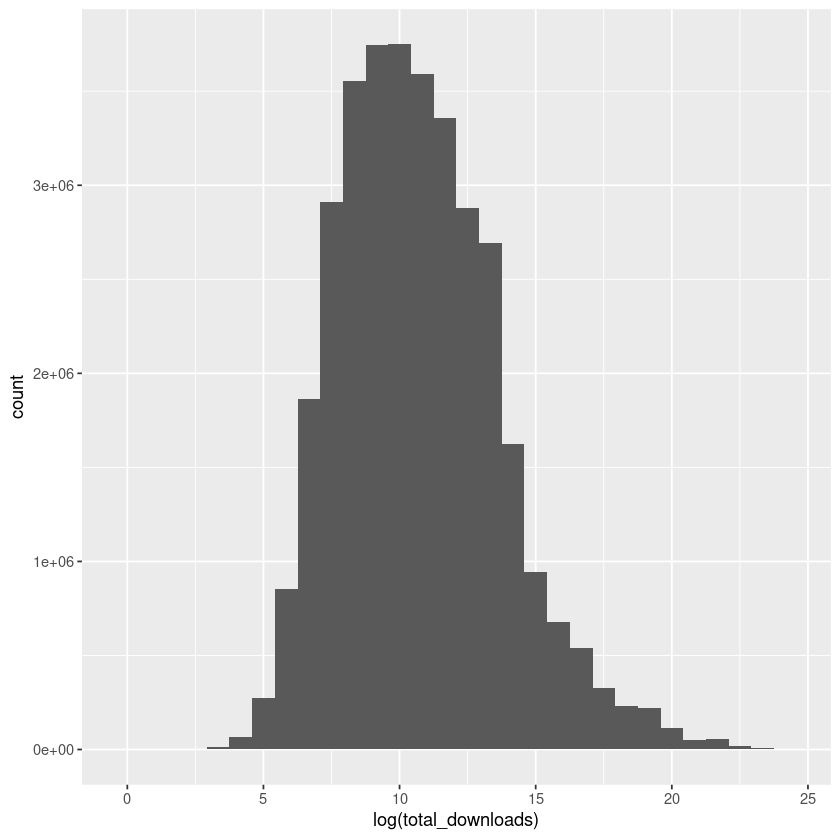

In [67]:
df %>% filter(total_downloads > 0) %>% ggplot(aes(x=log(total_downloads))) + geom_histogram()

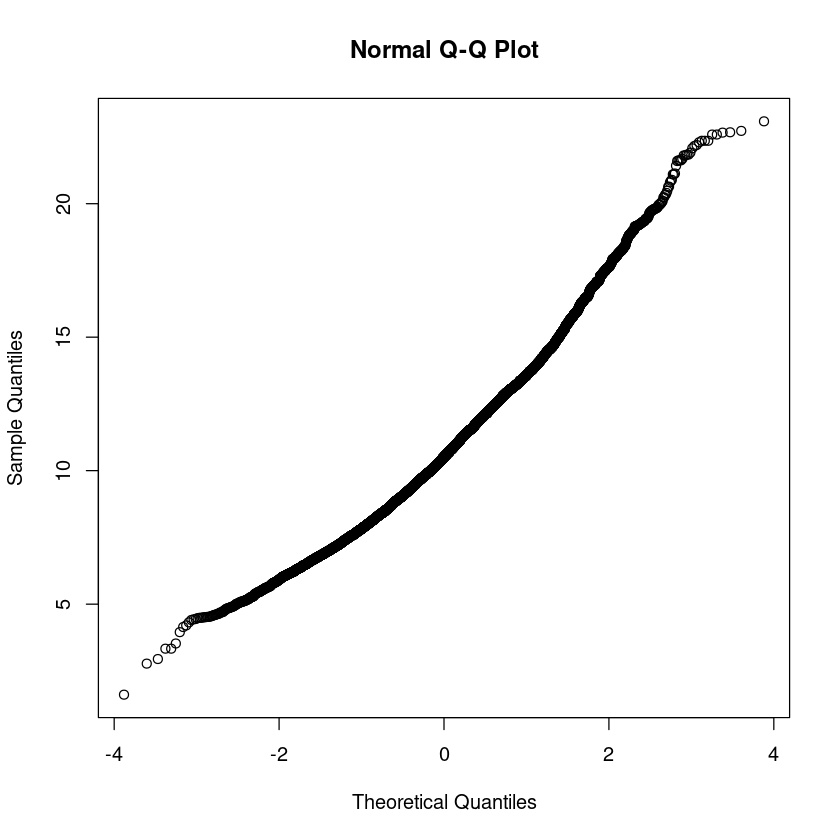

In [11]:
qqnorm(log((sample_n(df, 10000) %>% filter(total_downloads > 0))$total_downloads))

In [12]:
df %>% filter(total_downloads > 0) %>% ggplot(aes(x = log(n_bytes), y=log(total_downloads))) + geom_point()# + geom_smooth(method = "lm") + labs(x = "log(bytes)", y = "log(downloads)")

In [13]:
df

key,num_bytes,package_id,total_downloads,n_bytes,csum,row_num,perc_sum_bytes,perc_rows
<chr>,<int64>,<int64>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
imb_plugin-1.0.11.tgz,10,2158260,34862,10,10,1,3.832457e-13,2.797771e-08
cbk-tools-0.0.1-beta.34.tgz,20,1005998,10083,20,30,2,1.149737e-12,5.595542e-08
cbk-tools-0.0.1-beta.35.tgz,20,1005998,10083,20,50,3,1.916229e-12,8.393313e-08
@idn-model-test-1.0.0.tgz,29,677615,782,29,79,4,3.027641e-12,1.119108e-07
npmal-0.0.0.tgz,56,1463055,2379,56,135,5,5.173817e-12,1.398885e-07
gital-0.0.0.tgz,57,1226824,18192,57,192,6,7.358318e-12,1.678663e-07
gitist-0.0.0.tgz,58,1228411,18028,58,250,7,9.581143e-12,1.958440e-07
shlipidib-0.0.0.tgz,61,1754514,18114,61,311,8,1.191894e-11,2.238217e-07
whatchika-0.0.0.tgz,61,1949170,17924,61,372,9,1.425674e-11,2.517994e-07
